# Export lion patches to training dataset

In [1]:
INPUT_DIR='../../input/kaggle-sea-lion/02/'
OUTPUT_DIR='../../output/kaggle-sea-lion/99/'

IMAGE_DIMS_IN = (84,84,3)
IMAGE_DIMS_OUT = (56,56,3)
LABEL_DIMS = (6,)

In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import os

import modules.logging
from modules.logging import logger
import modules.lions as lions
from modules.utils import Timer
import modules.utils as utils

Using TensorFlow backend.


## Prepare output dataset

In [3]:
utils.mkdirs(OUTPUT_DIR, recreate=True)
modules.logging.setup_file_logger(OUTPUT_DIR + 'out.log')
logger.info('Dir ' + OUTPUT_DIR + ' created')

x_ds = None
y_ds = None

logger.info('creating dataset')
dataset_path = OUTPUT_DIR + utils.dataset_name('lion-patches-0px', IMAGE_DIMS_OUT)
h5file_out = h5py.File(dataset_path, 'w')
x_ds_out, y_ds_out = utils.create_xy_dataset(h5file_out, IMAGE_DIMS_OUT, LABEL_DIMS, x_dtype='u1')

dataset_path = INPUT_DIR + utils.dataset_name('lion-patches-0px', IMAGE_DIMS_IN)
h5file_in = h5py.File(dataset_path, 'r')
x_ds_in = h5file_in['X']
y_ds_in = h5file_in['Y']

logger.info('done')

2017-06-09 00:39:48,560 INFO Dir ../../output/kaggle-sea-lion/99/ created
2017-06-09 00:39:48,562 INFO creating dataset
2017-06-09 00:39:48,579 INFO done


## Open lion patches and crop to a new dimension

### Process each sample

In [4]:
logger.info('Process all lion patches')
qtty = len(x_ds_in)
for i,x in enumerate(x_ds_in):
    y = y_ds_in[i]
    a = int((IMAGE_DIMS_IN[0]-IMAGE_DIMS_OUT[0])/2)
    b = int((IMAGE_DIMS_IN[1]-IMAGE_DIMS_OUT[1])/2)
    aa = a + IMAGE_DIMS_OUT[0]
    bb = b + IMAGE_DIMS_OUT[1]
    x_cropped = x[a:aa,b:bb]
    utils.add_sample_to_dataset(x_ds_out, y_ds_out, x_cropped, y)
    utils.print_progress(status='cropping', current_value=i, target_value=qtty)

h5file_in.close()
h5file_out.close()

2017-06-09 00:39:48,590 INFO Process all lion patches


2262/2263 [=========================>] 99% cropping

### Validate dataset

2017-06-09 00:40:30,835 INFO showing 100 images
2017-06-09 00:40:30,837 INFO > [started] generating image patches. rows=11; cols=10...


2263
2263


/notebooks/datascience-snippets/kaggle-sea-lion/modules/utils.py:725: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if(image_labels!=None):


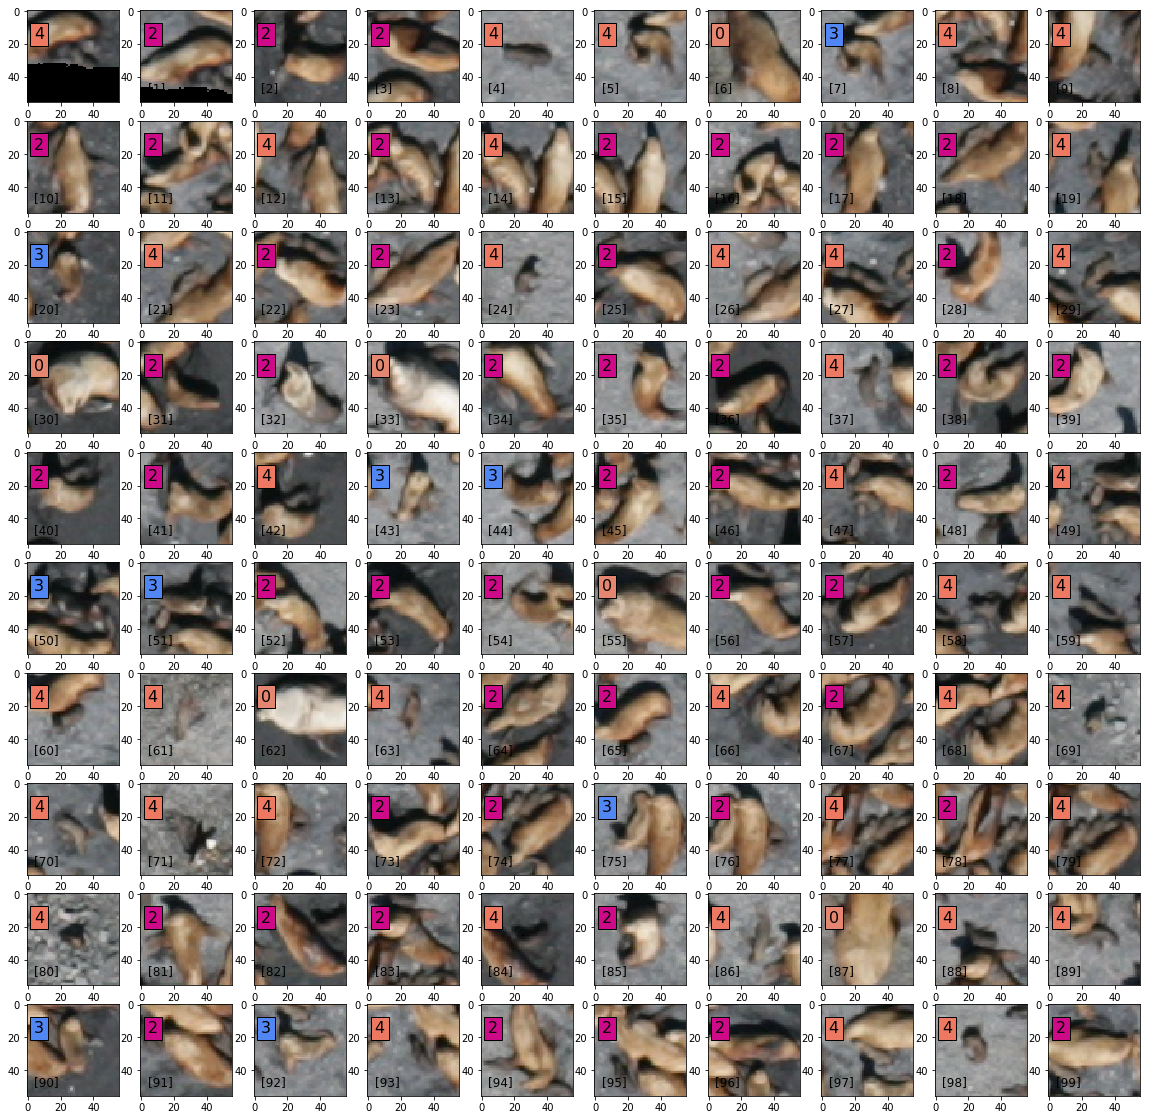

2017-06-09 00:40:39,264 INFO > [done]    generating image patches. rows=11; cols=10 (8427.243 ms)
2017-06-09 00:40:39,269 INFO output dataset length 2263
2017-06-09 00:40:39,270 INFO class distribution
2017-06-09 00:40:39,273 INFO [  78   45  675  150  281 1034]


In [5]:
dataset_path = OUTPUT_DIR + utils.dataset_name('lion-patches-0px', IMAGE_DIMS_OUT)
with h5py.File(dataset_path, 'r') as h5file:
    print(len(h5file['X']))
    print(len(h5file['Y']))
    utils.show_images(h5file['X'][0:100].astype('uint8'), image_labels=utils.onehot_to_label(h5file['Y'][0:100]), is_bgr=True, cols=10, size=2)
    logger.info('output dataset length ' + str(len(h5file['Y'][()])))
    logger.info('class distribution')
    logger.info(str(utils.class_distribution(h5file['Y'][()])))